Problem 1
In our first example we are looking at the temperature reading (meta-data) associated with an experiment. For the experiment to work reliably, the temperature should be at around 12 Kelvin, and if we look at the data it is mostly consistent with 12 Kelvin to within the 0.4 degree precision of the thermometry and the thermal control system (standard deviation). However, there are times when the thermal control system misbehaved and the temperature was not near 12 K, and in addition there are various glitches in the thermometry that give anomalously high and low readings (the reading does not match the real temperature). We definitely want to identify and throw out all the data when the thermal control system was not working (and the temperature was truly off from nominal). While it is possible to have an error in the thermometry such that the true temperature was fine, and we just had a wonky reading, in an abundance of caution we want to throw those values out too.

In [75]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import scipy.signal
from scipy import stats
import pandas as pd

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

To make this a bit concrete, we will simulate a little data. Start by simulating 100k 'good' data points assuming Gaussian fluctations, and because we are playing god adding the following 'bad' datapoints: {10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7}

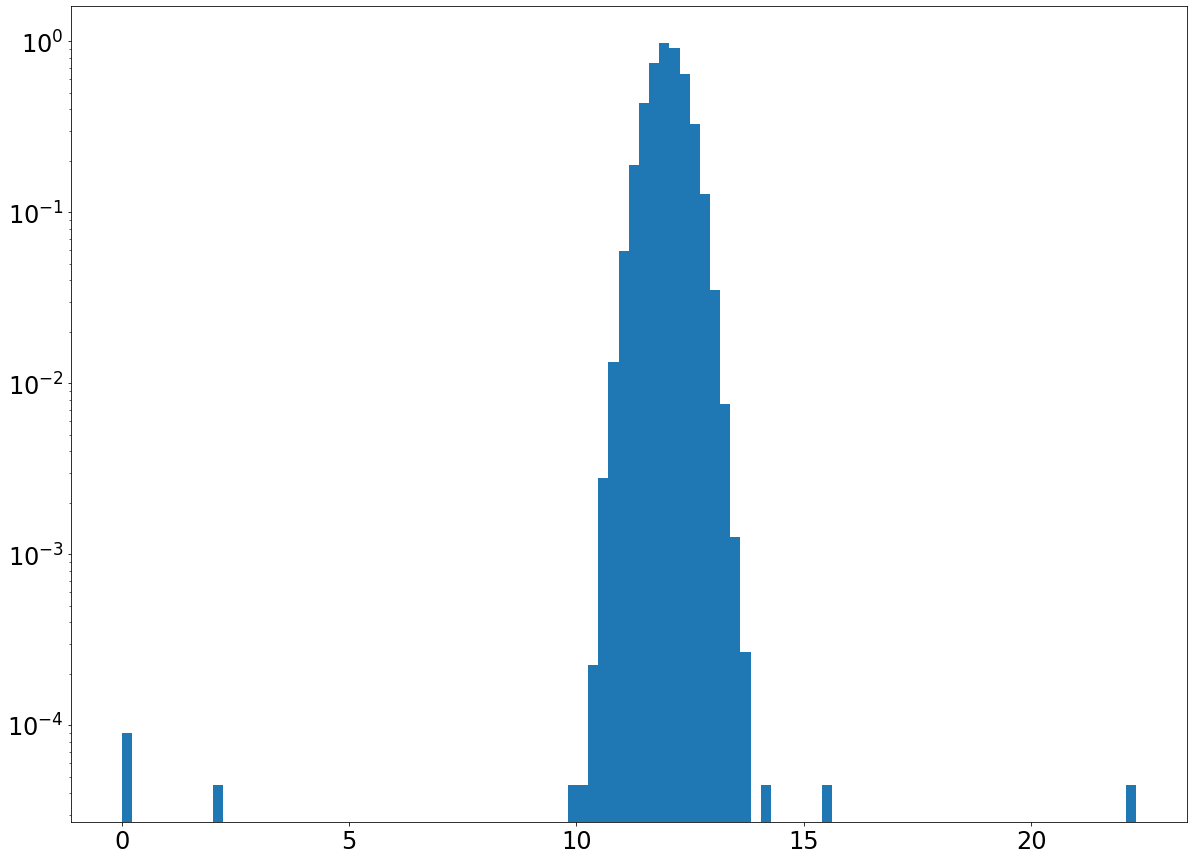

In [67]:
d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
fig, ax = plt.subplots(1, 1)
ax.hist(d,100, density=True)
plt.tick_params(labelsize = 24)
plt.yscale('log')
#x = np.linspace(4.95,5.05,1000)
#ax.plot(x,stats.norm.pdf(x,loc = 5., scale = 0.01),linewidth = 8,alpha = 0.7)
plt.show()

A) So our goal is to identify bad data and throw it out.

1. Start by exploring the data you have created with appropriate plots
2. State the statistical question in words. Be very clear, and describe why you have chosen this statistical question.
 
Is there a way that we can distinguish whether it is a good data or bad data? The reason why i chose this statistical question is because i think we can find the probability of getting a bad data and then find the relevent sigma, and outline the sigma must be the bad data point.

3. Restate your question in math. Be very clear.
If we know assume that the data outside +- 3 sigmas away can be regarded as bad datas, how many actually bad datas are there within 3 sigmas, or we can do better, we can say how about 5 sigmas away...

4. Apply your statistical test and construct a truth table.

We are trying to find the sigma value with a probability of getting bad value. p = 8 / 100000

In [68]:
-stats.norm.ppf(8/100008)

3.7750318807261567

This value represents the boundary on the left side

In [50]:
stats.norm.ppf(8/100008,loc = 12., scale = 0.4)

10.489987247709537

This value represents the boundary on the right side.

In [87]:
stats.norm.isf(8/100008,loc = 12., scale = 0.4)

13.510012752290463

In [96]:
gooddata = stats.norm.rvs(loc = 12., scale = 0.4, size = 100000)
baddata = [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7]
truenegative = 0
falsepositive = 0
falsenegative = 0
truepositive = 0
high = stats.norm.isf(8/100008,loc=12,scale=0.4)
low = stats.norm.ppf(8/100008,loc=12,scale=0.4)
for point in gooddata:
    if point > high or point < low:
        truenegative = truenegative + 1
    else:
        truepositive = truepositive + 1

for point in baddata:
    if point > high or point < low:
        falsenegative = falsenegative + 1
    else:
        falsepositive = falsepositive + 1
        
        
truthtable = pd.DataFrame(np.array([[truepositive,falsepositive],[truenegative,falsenegative]]),index = ['Positive','Negative'], columns=['True', 'False'])

In [97]:
truthtable

,True,False
Positive,99987,1
Negative,13,7


B) How does the number of omissions, where you threw out good data, depend on the statistical threshold you chose and is it a predictable quantity?

It depends on what sigma value we choose. If we choose a smaller sigma, we will end up with less bad datas and more good datas and if we choose a bigger sigma, we will have more bad datas and less good datas. Lets try with a sigma value 2.

In [100]:
truenegative = 0
falsepositive = 0
falsenegative = 0
truepositive = 0
pro = scipy.stats.norm.sf(2)
high = stats.norm.isf(pro,loc=12,scale=0.4)
low = stats.norm.ppf(pro,loc=12,scale=0.4)
for point in gooddata:
    if point > high or point < low:
        truenegative = truenegative + 1
    else:
        truepositive = truepositive + 1

for point in baddata:
    if point > high or point < low:
        falsenegative = falsenegative + 1
    else:
        falsepositive = falsepositive + 1
        
        
truthtable = pd.DataFrame(np.array([[truepositive,falsepositive],[truenegative,falsenegative]]),index = ['Positive','Negative'], columns=['True', 'False'])

In [101]:
truthtable

,True,False
Positive,95407,1
Negative,4593,7


Lets try with a sigma value 8.

In [94]:
truenegative = 0
falsepositive = 0
falsenegative = 0
truepositive = 0
pro = scipy.stats.norm.sf(8)
high = stats.norm.isf(pro,loc=12,scale=0.4)
low = stats.norm.ppf(pro,loc=12,scale=0.4)
for point in gooddata:
    if point > high or point < low:
        truenegative = truenegative + 1
    else:
        truepositive = truepositive + 1

for point in baddata:
    if point > high or point < low:
        falsenegative = falsenegative + 1
    else:
        falsepositive = falsepositive + 1
        
        
truthtable = pd.DataFrame(np.array([[truepositive,falsepositive],[truenegative,falsenegative]]),index = ['Positive','Negative'], columns=['True', 'False'])

In [95]:
truthtable

,True,False
Positive,100000,3
Negative,0,5


As you can see, when we do 2 sigmas, more good datas appears and when we do 8 sigmas, number of positive false increases, meaning that more bad datas has been taken.



C) Are there mistakes of commission (bad data getting in)? If yes, are they avoidable and how do they depend on your statistical threshold?


Yes, we have a mistake of commission, but if we lower the sigma value, we can lower the risk of getting bad values since we are trying to collect the data around the mean. As what i did from the above, we used the sigma value 2, and we can see that less bad data appears. Lets try with sigma value as 1.


In [102]:
truenegative = 0
falsepositive = 0
falsenegative = 0
truepositive = 0
pro = scipy.stats.norm.sf(1)
high = stats.norm.isf(pro,loc=12,scale=0.4)
low = stats.norm.ppf(pro,loc=12,scale=0.4)
for point in gooddata:
    if point > high or point < low:
        truenegative = truenegative + 1
    else:
        truepositive = truepositive + 1

for point in baddata:
    if point > high or point < low:
        falsenegative = falsenegative + 1
    else:
        falsepositive = falsepositive + 1
        
        
truthtable = pd.DataFrame(np.array([[truepositive,falsepositive],[truenegative,falsenegative]]),index = ['Positive','Negative'], columns=['True', 'False'])

In [103]:
truthtable

,True,False
Positive,68213,0
Negative,31787,8


Now we can see that there is no bad data collected.





Problem 2

In this example we will be looking for asteroids. If we look at the alignment of stars on subsequent images, they don't perfectly align due to atmospheric and instrumental effects (even ignoring proper motion). The resulting distribution is two dimensional, and for this lab let's assume it is a 2D Gaussian with 1 arcsecond RMS. Or said another way, if I histogram how far all the (stationary) stars appear to have moved I get something like:

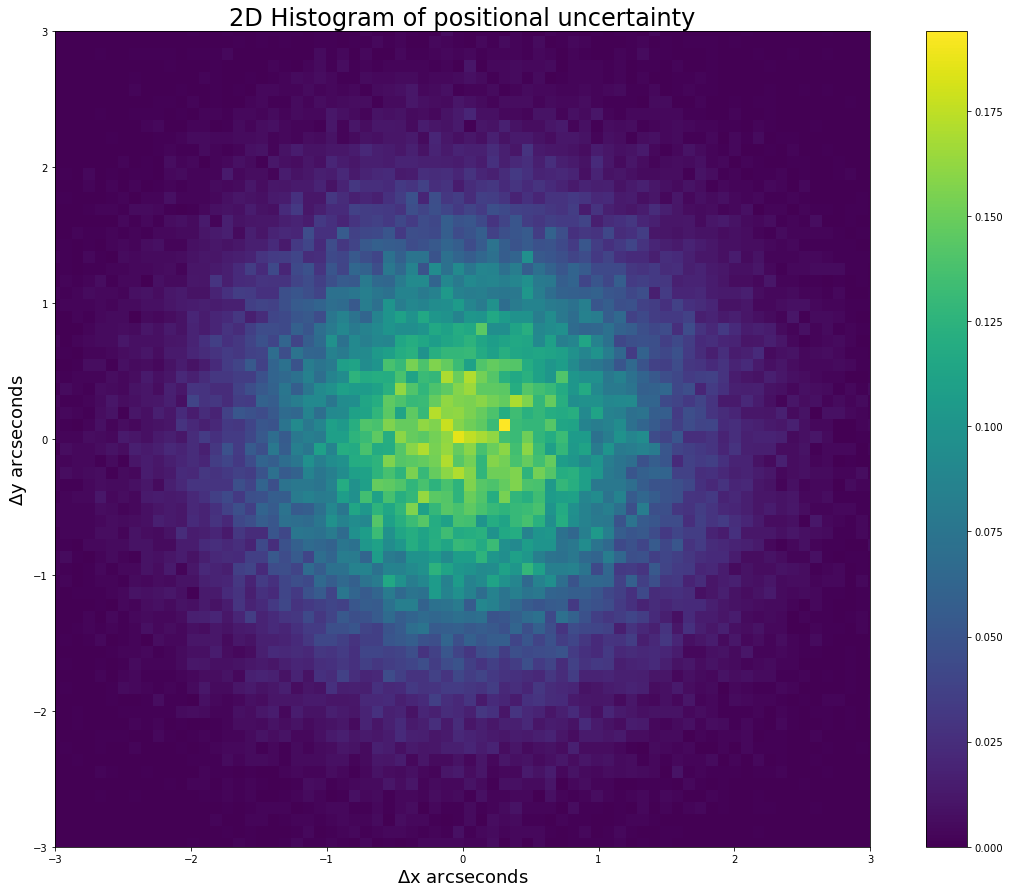

In [104]:
a = np.vstack((stats.norm.rvs( scale = 1, size = 100000), stats.norm.rvs( scale = 1, size = 100000)))
a.shape
fig, ax = plt.subplots(1, 1)
h = ax.hist2d(a[0,:],a[1,:],bins=100, density=True);
ax.set_aspect('equal', 'box')
plt.xlim([-3 , 3])
plt.ylim([-3 , 3])
plt.title("2D Histogram of positional uncertainty", fontsize = 24)
plt.ylabel("$\Delta$y arcseconds", fontsize = 18)
plt.xlabel("$\Delta$x arcseconds", fontsize = 18)
plt.colorbar(h[3], ax=ax)

If I have a potential asteroid, it will have some true movement between the images. We would like a '5 sigma' detection of movement. What is that distance in arcseconds?

What is the question in words?

Under the background that there is a 2d Gaussian with a mean of 0 and a standard deviation of 1 arc second, how much will a star need to travel in arcesconds from the center?

What is the question in math? [Hint: Come up with an analytic description of your pdf(). The Blue Book may be helpful here.]

what is the distrance travelled by the star with a 5 sigma probability in a normal distribution? As it is a 2d guassian distribution, what is the distance passed by the star, which is the square root of (delta x square + delta y square).

What distance in arcseconds represents a 5 sigma detection of motion?

In [116]:
p = 1 - stats.norm.cdf(5)
dis = stats.rayleigh.ppf(1-p)
print(' Distance = ' + str(round(dis,1)))

 Distance = 5.5



Problem 3

As we discussed in class, one of the key backgrounds for gamma-ray telescopes are cosmic rays. Cosmic rays are charged particles—usually protons or electrons but can include atomic nuclei such a alpha particles (helium) or iron. Because of their charge cosmic rays spiral in the magnetic field of the galaxy. From the perspective of the Earth they appear to be coming uniformly from all directions like a high energy gas, and the direction the cosmic ray is travelling when it reaches the Earth tells us nothing about where it came from because we don't know what tortured path it has taken through the galaxy to reach us. However, at trillion electron volt energies and above, the spiral loops are fairly big and the sun and the moon will block cosmic rays. This means the sun and the moon appear as holes in the cosmic ray sky (cosmic rays from that direction are absorbed).

Assume in a moon sized patch on the sky we normally have a cosmic ray rate of 1 cosmic ray per minute (arrivals are random in time). If we can observe where the moon is for 8 hours per night (not too close to the horizon) and we observe for 15 days and see 6800 cosmic rays, what is the signficance of our moon shadow detection?

1. What is the question in words?

What is the probability of seeing 6800 rays or less in 15 days?

2. Translate the question to math, describing both the expected background pdf() and the integral you need to do.

$$Probability = \int_{-\infty}^{6800}Poission(\mu=7200)\;dx$$

From the background information, we know that there are 7200 rays since there are 15 days with 1 ray per minite and 8 hours per day.  We can also know that it is a Poisson distribution and with the background Poisson distribution, what is the sigma value under the probability of seeing 6800 rays or less in 15 days?

3. Convert to sigma.

In [123]:
mean = 7200
probability = stats.poisson.cdf(6800,mean)
sig = stats.norm.ppf(1-probability)
print("The sigma value is " + str(sig))
print('The probability is ' + str(probability))

The sigma value is 4.750747965778662
The probability is 1.0133280183917768e-06
